# Testing examples from topography

In [ ]:
#!mamba env create -f '../../environment.yml'
#!mamba env update -f '../../environment.yml' --prune

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%aimport easysnowdata
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
import shapely
import dask
import pystac_client
import planetary_computer
import odc.stac
import matplotlib.pyplot as plt
import matplotlib.colors
import datetime

In [3]:
bbox_gdf = gpd.read_file('https://github.com/egagli/sar_snowmelt_timing/raw/main/input/shapefiles/mt_rainier.geojson')
#bbox_gdf = gpd.read_file('https://github.com/egagli/sar_snowmelt_timing/raw/main/input/shapefiles/olympic_peninsula.geojson')

## Copernicus DEM

In [6]:
%%time
cop30_dem = easysnowdata.topography.get_copernicus_dem(bbox_gdf)
cop30_dem

CPU times: user 94.7 ms, sys: 11.2 ms, total: 106 ms
Wall time: 2.14 s


<xarray.DataArray 'data' (latitude: 563, longitude: 828)> Size: 2MB
dask.array<getitem, shape=(563, 828), dtype=float32, chunksize=(563, 828), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 5kB 46.95 46.95 46.95 ... 46.79 46.79 46.79
  * longitude    (longitude) float64 7kB -121.9 -121.9 -121.9 ... -121.6 -121.6
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2021-04-22

In [7]:
%%time
cop90_dem = easysnowdata.topography.get_copernicus_dem(bbox_gdf, resolution=90)
cop90_dem

CPU times: user 56.5 ms, sys: 19.1 ms, total: 75.6 ms
Wall time: 1.12 s


<xarray.DataArray 'data' (latitude: 188, longitude: 276)> Size: 208kB
dask.array<getitem, shape=(188, 276), dtype=float32, chunksize=(188, 276), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 2kB 46.95 46.95 46.95 ... 46.8 46.79 46.79
  * longitude    (longitude) float64 2kB -121.9 -121.9 -121.9 ... -121.6 -121.6
    spatial_ref  int32 4B 4326
    time         datetime64[ns] 8B 2021-04-22

Text(0.5, 1.0, 'Copernicus 90m DEM')

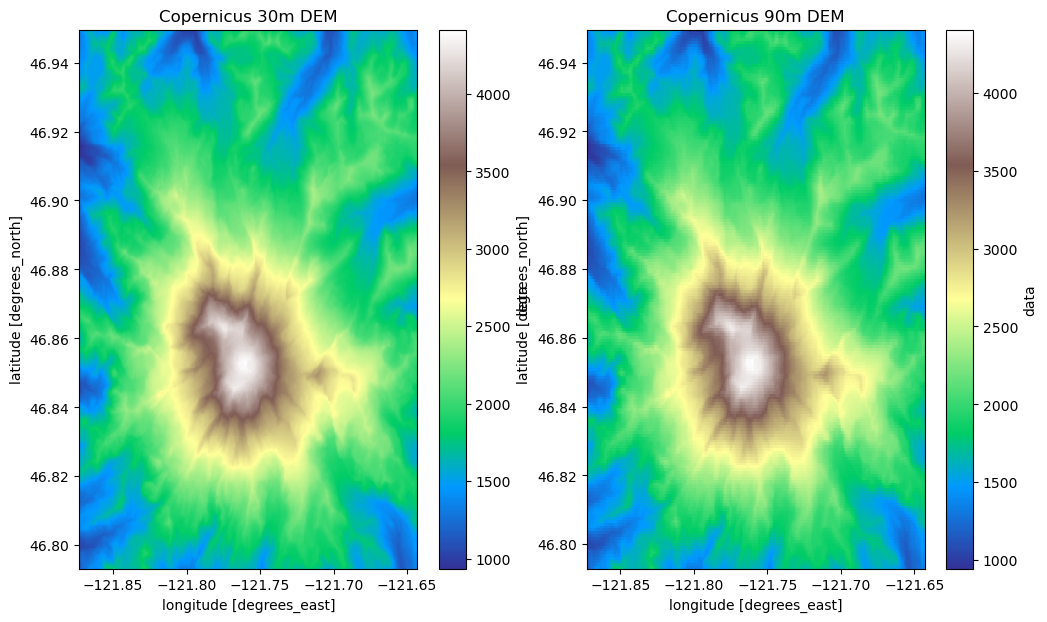

In [8]:
f,ax=plt.subplots(1,2,figsize=(12,7))

cop30_dem.plot(ax=ax[0],cmap='terrain')
cop90_dem.plot(ax=ax[1],cmap='terrain')


ax[0].set_title('Copernicus 30m DEM')
ax[1].set_title('Copernicus 90m DEM')

In [9]:
%%time
dsm_3dep = easysnowdata.topography.get_3dep_dem(bbox_gdf,dem_type='DTM')
dsm_3dep.item_collection()

CPU times: user 29.2 ms, sys: 9.85 ms, total: 39.1 ms
Wall time: 1.05 s


In [11]:
!pip install -q py3dep
import py3dep

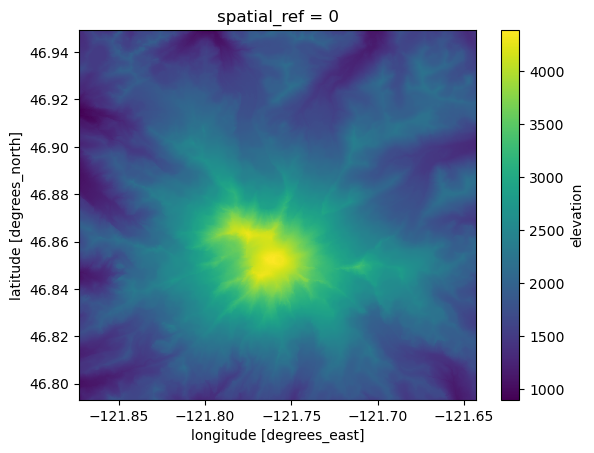

In [20]:
py3dep.get_map('DEM',geometry=bbox_gdf.geometry[0],resolution=10).plot()

In [33]:
tuple(bbox_gdf.bounds.values[0])

(-121.87271118164062,
 46.79324342530679,
 -121.64302825927734,
 46.94932478023444)

In [36]:
py3dep.query_3dep_sources(tuple(bbox_gdf.bounds.values[0]))

,dem_res,geometry,demname,pmethod,s_date,freetext,resolution,zunit,rmsez,rmsez_fva,...,project,project_id,p_method,p_device,collect_start,collect_end,pub_date,metadata_link,SHAPE_Area,SHAPE_Length
0,3m,"POLYGON ((-121.76566 46.75004, -121.76566 46.7...",wa_lewis_dem,7.0,2009.0,,19.0,1.0,0.49,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3m,"MULTIPOLYGON (((-121.71594 46.99417, -121.7175...",mt_ranier,7.0,2008.0,Washington state,19.0,1.0,0.37,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10m,"MULTIPOLYGON (((-121.45222 46.76898, -121.4522...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,0.0,linear-mode lidar,UNKNOWN,2008-01-01,2008-12-31,2010-08-01,,1.895621e+09,222377.0806
3,30m,"MULTIPOLYGON (((-121.45111 46.76917, -121.4511...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,0.0,linear-mode lidar,UNKNOWN,2008-01-01,2008-12-31,2010-08-01,,1.895746e+09,222955.4070


In [35]:
py3dep.check_3dep_availability(tuple(bbox_gdf.bounds.values[0]))

{'1m': False,
 '3m': True,
 '5m': False,
 '10m': True,
 '30m': True,
 '60m': False,
 'topobathy': False}